In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:


# --- 1. GENERACIÓN DE DATOS ---
# Caso A: Datos Normales (Simétricos, como notas de un examen)
np.random.seed(42) # Para que siempre salga igual
datos_normales = np.random.normal(loc=50, scale=5, size=1000)

# Caso B: Datos Sesgados (Asimétricos, como salarios o latencia de red)
# Usamos 'gamma' para crear una cola larga a la derecha
datos_sesgados = np.random.gamma(shape=2, scale=10, size=1000)

# Caso C: Dos variables relacionadas (para Covarianza/Correlación)
x = np.linspace(0, 10, 100)
# Y se mueve con X, pero con un poco de "ruido" aleatorio
y = 2 * x + 5 + np.random.normal(0, 2, 100)

# --- 2. CÁLCULO DE ESTADÍSTICOS (Muestra) ---
def calcular_stats(datos, nombre):
    print(f"\n--- {nombre} ---")
    mean = np.mean(datos)
    median = np.median(datos)
    # OJO: ddof=1 es para usar (n-1) como vimos en la teoría (Muestral)
    var = np.var(datos, ddof=1)
    std = np.std(datos, ddof=1)
    skew = st.skew(datos)
    kurt = st.kurtosis(datos)
    
    print(f"1. Media (x̄):      {mean:.2f}")
    print(f"2. Mediana (m):    {median:.2f}")
    print(f"3. Varianza (s²):  {var:.2f}")
    print(f"4. Desv. Est (s):  {std:.2f}")
    print(f"5. Skewness (ζ):   {skew:.2f}  (>0 cola derecha, <0 izquierda)")
    print(f"6. Kurtosis (κ):   {kurt:.2f}  (>0 picuda, <0 plana)")

# Ejecutamos los cálculos
calcular_stats(datos_normales, "DATOS NORMALES (Simétricos)")
calcular_stats(datos_sesgados, "DATOS SESGADOS (Asimétricos)")

# Cálculos de Relación (X vs Y)
print(f"\n--- RELACIÓN X vs Y ---")
# Covarianza (Matriz: posición [0,1] es la covarianza entre x e y)
cov = np.cov(x, y, ddof=1)[0][1]
# Correlación de Pearson
corr, _ = st.pearsonr(x, y)

print(f"7. Covarianza (Sxy): {cov:.2f} (Positiva = se mueven juntos)")
print(f"8. Correlación (r):  {corr:.4f} (Cercano a 1 = relación fuerte)")





--- DATOS NORMALES (Simétricos) ---
1. Media (x̄):      50.10
2. Mediana (m):    50.13
3. Varianza (s²):  23.97
4. Desv. Est (s):  4.90
5. Skewness (ζ):   0.12  (>0 cola derecha, <0 izquierda)
6. Kurtosis (κ):   0.07  (>0 picuda, <0 plana)

--- DATOS SESGADOS (Asimétricos) ---
1. Media (x̄):      20.49
2. Mediana (m):    17.32
3. Varianza (s²):  193.63
4. Desv. Est (s):  13.91
5. Skewness (ζ):   1.23  (>0 cola derecha, <0 izquierda)
6. Kurtosis (κ):   1.88  (>0 picuda, <0 plana)

--- RELACIÓN X vs Y ---
7. Covarianza (Sxy): 17.61 (Positiva = se mueven juntos)
8. Correlación (r):  0.9435 (Cercano a 1 = relación fuerte)


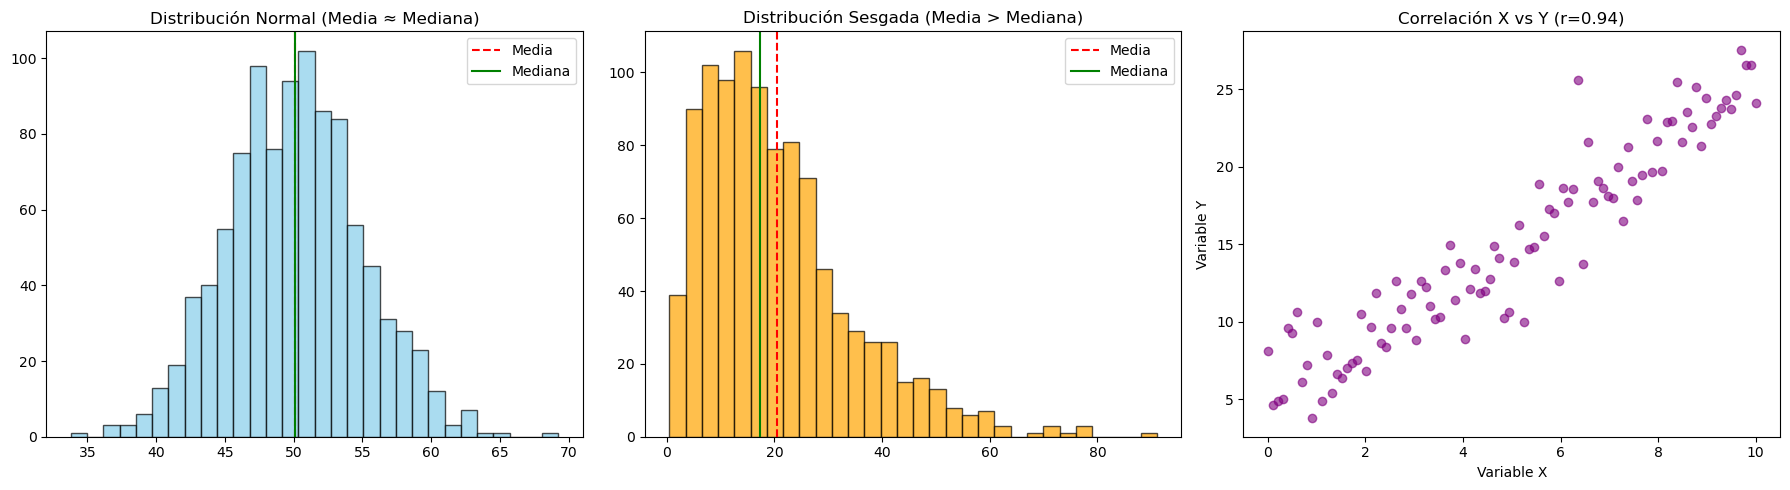

In [4]:
# --- 3. VISUALIZACIÓN (¡A verlos!) ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráfica 1: Normal
ax[0].hist(datos_normales, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax[0].axvline(np.mean(datos_normales), color='red', linestyle='--', label='Media')
ax[0].axvline(np.median(datos_normales), color='green', linestyle='-', label='Mediana')
ax[0].set_title('Distribución Normal (Media ≈ Mediana)')
ax[0].legend()

# Gráfica 2: Sesgada
ax[1].hist(datos_sesgados, bins=30, color='orange', edgecolor='black', alpha=0.7)
ax[1].axvline(np.mean(datos_sesgados), color='red', linestyle='--', label='Media')
ax[1].axvline(np.median(datos_sesgados), color='green', linestyle='-', label='Mediana')
ax[1].set_title('Distribución Sesgada (Media > Mediana)')
ax[1].legend()

# Gráfica 3: Correlación
ax[2].scatter(x, y, color='purple', alpha=0.6)
ax[2].set_title(f'Correlación X vs Y (r={corr:.2f})')
ax[2].set_xlabel('Variable X')
ax[2].set_ylabel('Variable Y')

plt.tight_layout()
plt.show()